In [1]:
#Classes kNIFE b8
# rajor blade b7, B51
# b49 GUN
# b52 - 54, B50 shuriken

In [2]:
# Background
# 9-44 Has only guns, Put other stuff

In [3]:
import random
import os
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from PIL import Image,ImageDraw

import skimage.exposure

from utils import seperate_background,rotate_image,morpholize_image, get_bounding_box,rect,insert_image

In [4]:
#provide full path to whole baggage dataset
data_location = '/media/noobie/Data/MMD/MM811(AI)/Project/harmful_object_detection_in_baggage_xray/Baggages/Baggages'

Since the Images from 9-44 only have guns, we will add knife, rajor blade, and shuriken to them to increase robustness of the dataset

## Loading Background Images

In [5]:
background = range(44,44+1) # adding 1 to include 44 
background_paths = []

folder_name = f'gun_back'
all_files = [ os.path.join(data_location,folder_name,img) for img in os.listdir(os.path.join(data_location,folder_name)) if '.png' in img]
background_paths.extend(all_files)
print(f'Scanning Folder : {folder_name} Found Images : {len(all_files)}')
print(f'Total Background Images: {len(background_paths)}')

Scanning Folder : gun_back Found Images : 45
Total Background Images: 45


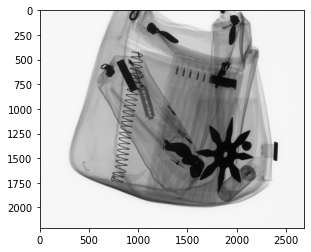

In [6]:
# Display random Background image
img = Image.open(random.choice(background_paths))
plt.imshow(img,cmap='gray')

## Loading the Foreground Images(Threats)


In [7]:
#Classes kNIFE b8
# rajor blade b7, B51
# b49 GUN
# b52 - 54, B50 shuriken
threat_map = {
    'knife':['B0008'],
    'rajor blade':['B0007','B0051'],
    'gun':['B0049'],
    'shuriken':['B0052','B0053','B0054','B0050'],
}
threat_paths = {
    'knife':[],
    'rajor blade':[],
    'gun':[],
    'shuriken':[],
}

In [8]:
# Load path to all threat images
# now we will get path to all the images inside these folders
for label,folders in threat_map.items():
    for folder_name in folders:
        
        all_files = [ os.path.join(data_location,folder_name,img) for img in os.listdir(os.path.join(data_location,folder_name)) if '.png' in img]
        threat_paths[label].extend(all_files)
        print(f'{label} : {folder_name} Found Images : {len(all_files)}')


knife : B0008 Found Images : 361
rajor blade : B0007 Found Images : 20
rajor blade : B0051 Found Images : 100
gun : B0049 Found Images : 200
shuriken : B0052 Found Images : 144
shuriken : B0053 Found Images : 144
shuriken : B0054 Found Images : 144
shuriken : B0050 Found Images : 100


Display Images sample

knife Images: 361
rajor blade Images: 120
gun Images: 200
shuriken Images: 532


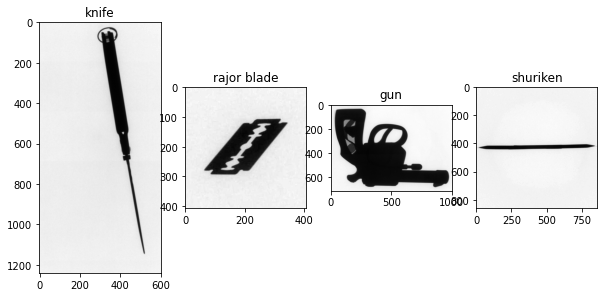

In [9]:
figure=plt.figure(figsize=(10,10))
count =1
for label, images in threat_paths.items():
    image = random.choice(images)
    img = Image.open(random.choice(images))
    plt.subplot(1,4,count)
    count+=1
    plt.title(label)
    plt.imshow(img,cmap='gray')
    print(f'{label} Images: {len(images)}')

## Creating Synthetic Images

In [10]:
# below the white region is the valid point for insertion
## testing background processing

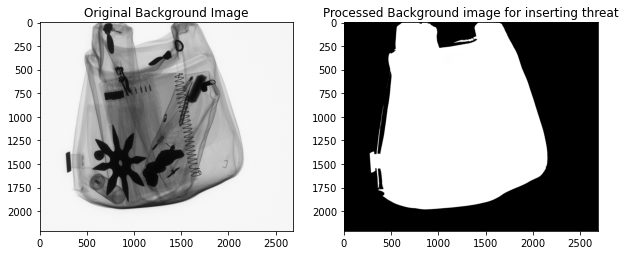

In [11]:
test_background = random.choice(background_paths)
img_morpholized = morpholize_image(test_background)

figure=plt.figure(figsize=(10,10))

plt.subplot(121)
img = Image.open(test_background)
plt.title('Original Background Image')
plt.imshow(img,cmap='gray')

plt.subplot(122)
plt.title('Processed Background image for inserting threat')
plt.imshow( img_morpholized,cmap='gray')
plt.show()

In [12]:
## testing image insertion

In [13]:
def generate_synthetic(number,threat_type,threat_paths,background_paths,synthetic_images_base):
    """
    Generate number  of synthetic images
    """
    image_meta_data = []
    threshold=100
    if threat_type=='rajor blade':
        threshold = threshold*2
    threats = threat_paths[threat_type]
    while number!=0:
        try:
            print(f'{threat_type}  {number} ')
            threat = random.choice(threats)
            background = random.choice(background_paths)
            tipped_image_no_bbox, tipped_image ,bbox = insert_image(threat_path=threat, background_path=background,threshold=threshold)
            image_name = f'{threat_type}_{number}.jpg'
            image_name_box = f'{threat_type}_{number}_box.jpg'
            image_meta_data.append(
                {

                    'path':image_name,
                    'label':threat_type,
                    'xmin':bbox[0][0],
                    'ymin':bbox[0][1],
                    'xmax':bbox[-1][0],
                    'ymax':bbox[-1][1],
                }
            )
    #         print(threat)
            tipped_image_no_bbox.save(os.path.join(synthetic_images_base,image_name))
#             tipped_image.save(os.path.join(synthetic_images_base,image_name_box))
            number = number-1
    #         plt.imshow(tipped_image)
    #         plt.title('Results')
    #         plt.show()
    #         break
        except Exception as e:
            print(e)
    return image_meta_data

In [14]:
synthetic_images_base = '/media/noobie/Data/MMD/MM811(AI)/Project/Harmful_Objects_X-Ray_Baggage/TIP/guns_images'

In [15]:
meta_data = []


In [16]:

meta_data_mini = generate_synthetic(number=100,threat_type='gun',threat_paths=threat_paths,background_paths=background_paths,synthetic_images_base=synthetic_images_base)
meta_data.extend(meta_data_mini)

# meta_data_mini = generate_synthetic(number=500,threat_type='rajor blade',threat_paths=threat_paths,background_paths=background_paths,synthetic_images_base=synthetic_images_base)
# meta_data.extend(meta_data_mini)


# meta_data_mini = generate_synthetic(number=500,threat_type='shuriken',threat_paths=threat_paths,background_paths=background_paths,synthetic_images_base=synthetic_images_base)
# meta_data.extend(meta_data_mini)


gun  100 
999
998
997
996
995
994
993
gun  99 
999
998
997
996
995
gun  98 
999
gun  97 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
gun  96 
999
998
997
996
995
994
gun  95 
999
998
997
996
gun  94 
999
998
997
996
995
994
993
992
991
990
gun  93 
999
998
997
gun  92 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
gun  91 
999
998
997
996
995
994
993
992
gun  90 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
gun  89 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
gun  88 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
gun  87 
999
gun  86 
999
gun  85 
999
998
997
996
995
994
993
992

999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
gun  28 
999
998
997
996
995
994
993
992
991
990
gun  27 
999
998
997
996
995
gun  26 
999
gun  25 
cannot identify image file 'tmpc.png'
gun  25 
999
998
997
996
gun  24 
999
998
997
996
995
994
993
992
991
990
989
988
987
gun  23 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
gun  22 
999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984
983
982
981
980
979
978
977
976
975
974
973
972
971
970
969
968
967
966
965
964
963
962
961
960
959
958
957
956
955
954
953
952
951
950
949
948
947
946
945
944
943
942
941
940
939
938
937
936
935
934
933
932
931
930
929
928
927
926
925
924
923
922
921
920
919
918
917
916
915
914
913
912
911
910
909
908
907
906
905
904
903
902
901
900
899
898
897
896
895
894
893
892
891
890
88

In [17]:
def seperate_background(img_name):
    # https://stackoverflow.com/questions/5365589/white-background-to-transparent-background-using-pil-python
    threshold=200
    dist=5
    # print(img_name)
    img=Image.open(img_name).convert('RGBA')
    # img = img.rotate(100)
    # np.asarray(img) is read only. Wrap it in np.array to make it modifiable.
    arr=np.array(np.asarray(img))
    r,g,b,a=np.rollaxis(arr,axis=-1)    
    mask=((r>threshold)
        & (g>threshold)
        & (b>threshold)
        & (np.abs(r-g)<dist)
        & (np.abs(r-b)<dist)
        & (np.abs(g-b)<dist)
        )
    arr[mask,3]=0
    img=Image.fromarray(arr,mode='RGBA')
    img.rotate(90)
    img.save('tmpc.png')
    return 'tmpc.png'


In [18]:
seperate_background('/media/noobie/Data/MMD/MM811(AI)/Project/harmful_object_detection_in_baggage_xray/Baggages/Baggages/B0007/B0007_0005.png')

'tmpc.png'

In [19]:
import pandas as pd

In [20]:
df =pd.DataFrame(meta_data)
df.to_csv('labels_gun.csv')

In [21]:
test_background = random.choice(background_paths)
test_threat = random.choice(threat_paths['knife'])
tipped_image_no_bbox, tipped_image ,bbox = insert_image(threat_path=test_threat, background_path=test_background)

999
998
997
996
995
994
993
992
991
990
989
988
987
986
985
984


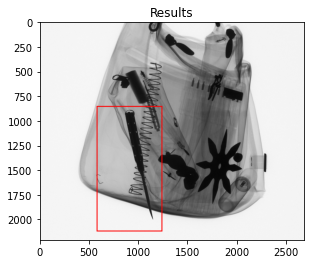

In [22]:

# figure=plt.figure(figsize=(20,20))

plt.imshow(tipped_image)
plt.title('Results')
    
plt.show()

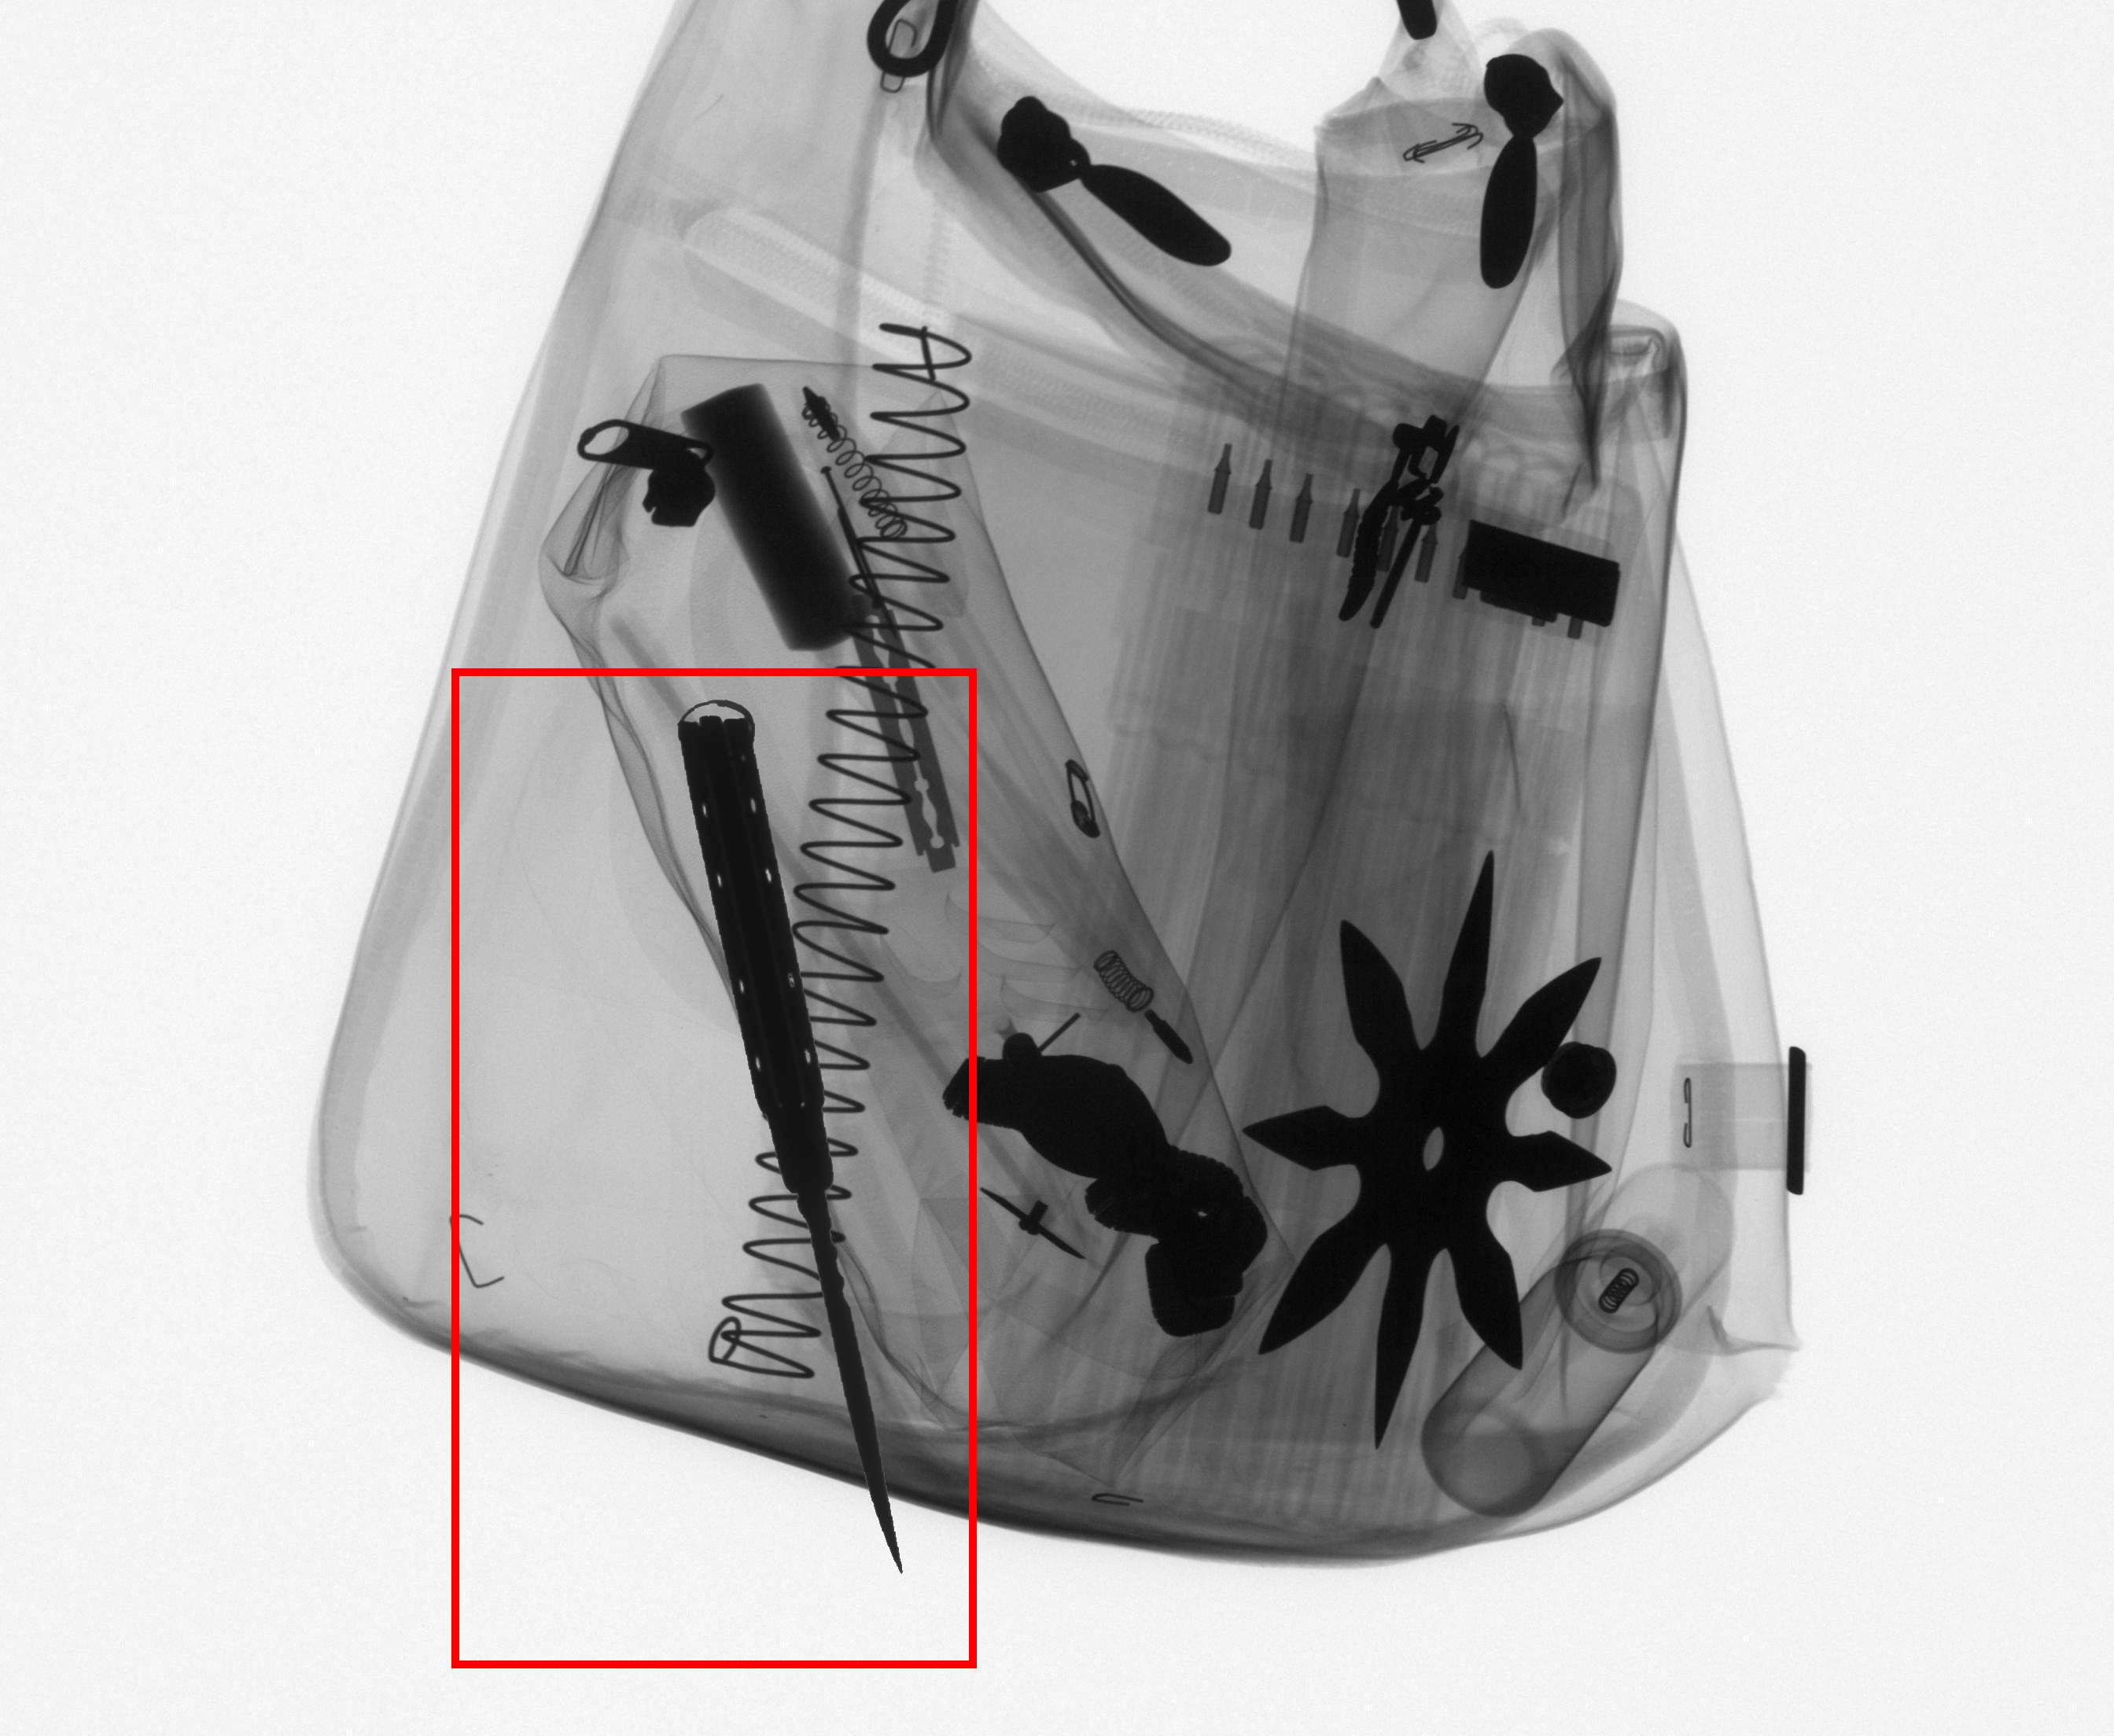

In [23]:
tipped_image.copy()

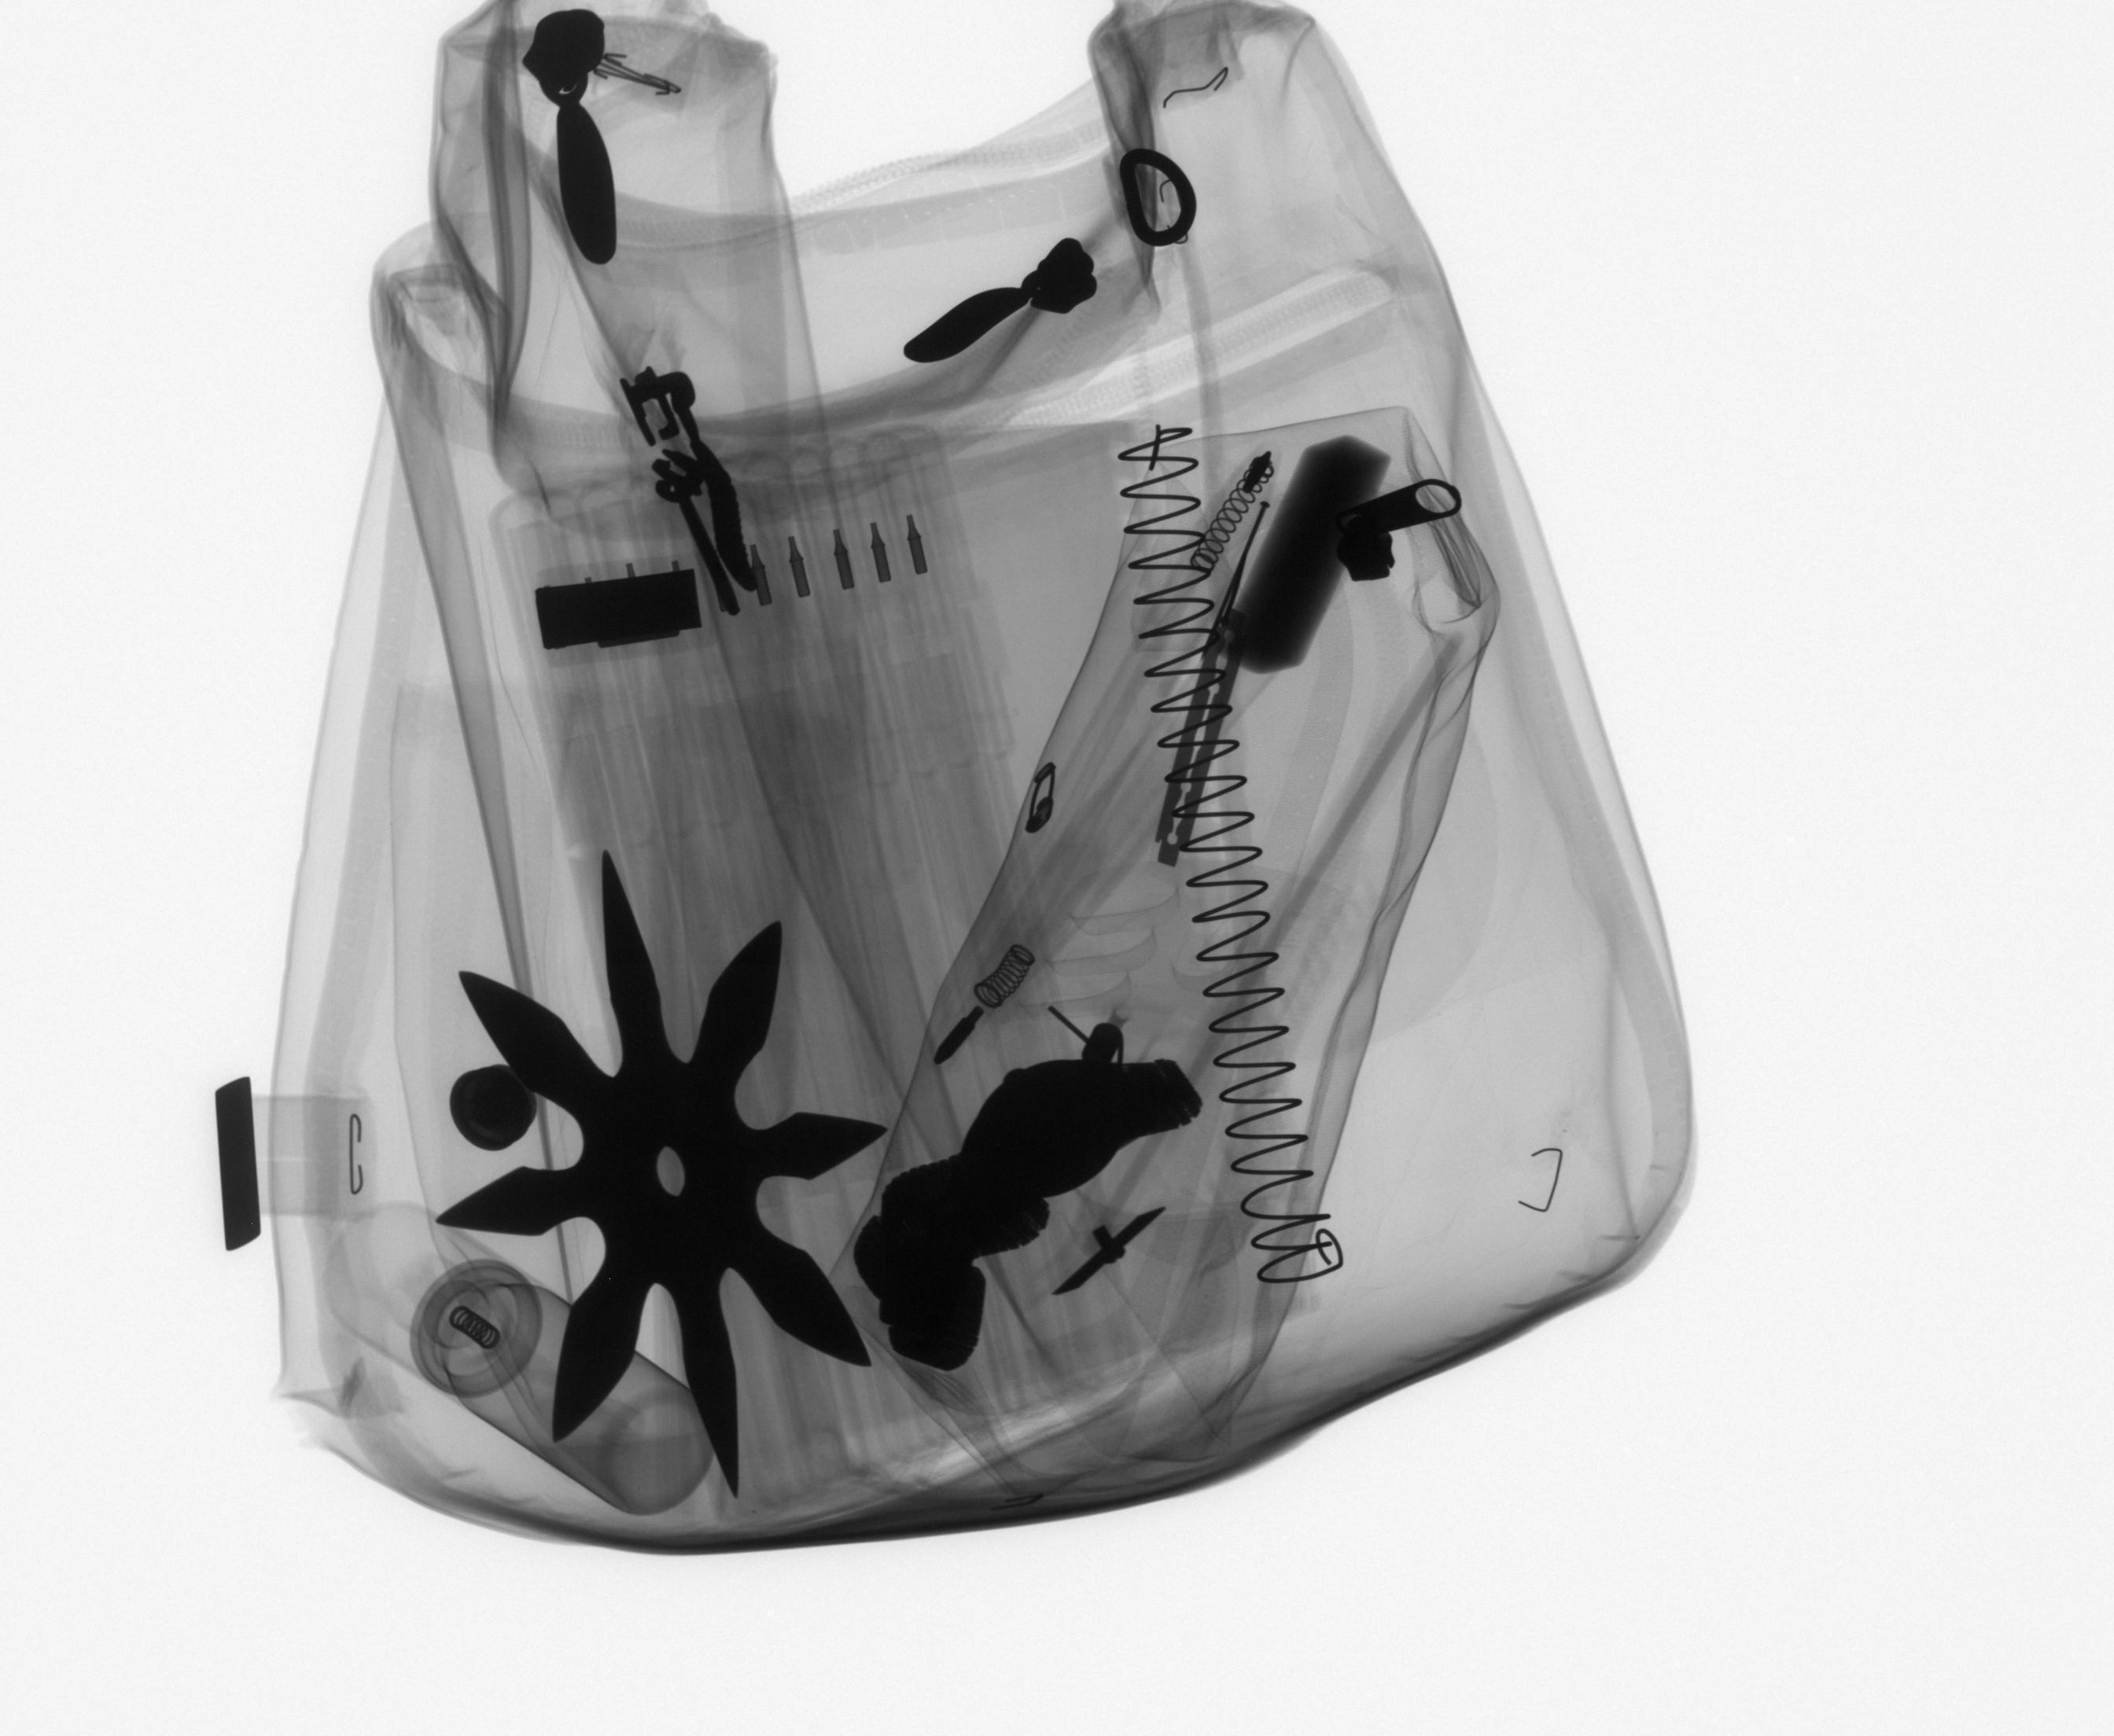

In [24]:
img